In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Engineering Workshop


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %uv  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%l

In [3]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

### execute shell commands by prefixing !


In [4]:
!dir

 Volume in drive D is LENOVO
 Volume Serial Number is 6E11-7CA2

 Directory of D:\handson

16-04-2025  09:27    <DIR>          .
16-04-2025  09:27    <DIR>          ..
16-04-2025  09:11    <DIR>          .ipynb_checkpoints
04-04-2025  14:39    <DIR>          DAY1
04-04-2025  14:37    <DIR>          DAY2
07-04-2025  16:35    <DIR>          DAY3
08-04-2025  16:19    <DIR>          DAY4
09-04-2025  16:35    <DIR>          DAY5
10-04-2025  16:23    <DIR>          DAY6
14-04-2025  09:38    <DIR>          DAY7
14-04-2025  16:48    <DIR>          DAY8
15-04-2025  16:32    <DIR>          DAY9
16-04-2025  09:27            20,019 first.ipynb
               1 File(s)         20,019 bytes
              12 Dir(s)   8,154,357,760 bytes free


In [5]:
# more Help 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [6]:
x = np.array([1,2,3,4])                 #1, (4, )
y = np.linspace(2.0, 3.0, num=100)      #1, (100,)
z = np.arange(12)                       #1, (12,)
ru = np.random.random( (2,6) )  # 2x6   #2, (2,6)
rn = np.random.normal(0.0, 1, (6,2))    #2, (6,2)


In [10]:
print(ru, ru.ndim, ru.shape, sep="\n")

[[0.05740212 0.75928531 0.70359043 0.90294824 0.47210516 0.76559852]
 [0.3947228  0.22664993 0.93343315 0.21122585 0.26081683 0.03448534]]
2
(2, 6)


### Reshape, squeeze, ravel, adding axis, np.newaxis  etc

In [17]:
# z.reshape(3,4)            #(12,)  =>  (3,4), (2,6), (12,1), (1,12)
z1 = z.reshape(1,1,1,1, 3, 1, -1)      #ndim = 7, shape = (1,1,1,1,3,1,4)
z1.shape

(1, 1, 1, 1, 3, 1, 4)

In [19]:
z1.squeeze().shape  #removing axises which contains shape 1

(3, 4)

In [21]:
z1.ravel().shape  #flattening to get vector 

(12,)

In [23]:
#adding new axiss, : means slice, : means all elements in row,
z[:, None].shape   #To increase dimension by adding shape 1, 
                   #use respae of this shortcut of putting None or np.newaxis

(12, 1)

In [24]:
z[None, :].shape

(1, 12)

In [25]:
#or 
z[:, np.newaxis].ravel() == z[np.newaxis, :].ravel()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [42]:
# accessing by [i,j,k,...]  access, can contain slice ,
# any operation like == happens elementwise 

#Accesing 
z[0]
ru[0, 0]
ru[:, 0]
ru[:, 1:2:2]  #can contain slice 
ru[ ru > 0.5]  #condition
ru[ (ru > 0.1) & (ru < 0.7) ] 
ru [0, 0] = 10
ru

array([[10.        ,  0.75928531,  0.70359043,  0.90294824,  0.47210516,
         0.76559852],
       [ 0.3947228 ,  0.22664993,  0.93343315,  0.21122585,  0.26081683,
         0.03448534]])

In [43]:
#elementwise ops
ru + ru  # is dimension changing?- dimension should match or see below

array([[20.        ,  1.51857062,  1.40718085,  1.80589647,  0.94421032,
         1.53119705],
       [ 0.7894456 ,  0.45329986,  1.86686629,  0.42245169,  0.52163366,
         0.06897069]])

In [62]:
#Broadcasting
ru + 2   #dimension is not same, but 2 can be brocasted into (2,6) diemsnion by repeating
z[:, None] + z[None, :]  # (12,1) + (1,12) => (12,12)



array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]])

In [48]:
z[None, :].shape

(1, 12)

In [61]:
#matrix ops
np.mat(ru) * np.mat(rn)  # 2,6  x 6,2 => 2, 2
np.mat(ru).T             # 2,6 => 6,2
np.mat(ru) * np.mat(ru).I            # 2,6 x 6,2 = I

matrix([[ 1.00000000e+00, -1.82755804e-17],
        [ 9.89318012e-18,  1.00000000e+00]])

In [80]:
#sum , mean, std,....etc method
np.sum(ru)   #ravel and sum
ru.sum(axis=0)  # row varying - columnwise - (6,)
ru.sum(axis=1) #col varying,  rowsise - (2,)

y1= y.reshape(2,2,5,5) #(2, 2, 5, 5)
#axis =0, to 3
y1.sum(axis=0).shape  #(2,5,5)
y1.sum(axis=3).shape   #(2,2,5)  res[0,0,0] = SUM of y1[0,0,0,:]

(2, 2, 5)

In [64]:
#Other methods - elementwise 
len(dir(np))
np.sqrt(ru)

array([[3.16227766, 0.87136979, 0.83880297, 0.95023588, 0.68709909,
        0.87498487],
       [0.62826969, 0.47607765, 0.96614344, 0.45959313, 0.51070229,
        0.1857023 ]])

In [89]:
#hstack and vstack
x = np.array([[1,2],[3,4]])
y = np.array([5,6])
y1 = np.array([5,6,7,8])

#vstack (M,N) - below should be (1,N) , 2nd dimension is fixed and depends on first arg
np.vstack( (x, y[None, :]) )
np.vstack( (x, y1.reshape(-1, 2) ) )
#hstack - (M,N) - side wise should be (M,1) - 1st diemnsion is fixed, depends on first arg
np.hstack( (x, y[:, None]) )
np.hstack( (x, y1.reshape(2,-1) ) )

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [82]:
x.shape, y.shape

((2, 2), (2,))

# Matplotlib

In [90]:
# FigureCanvas - lowest level, Renderer knows how to use FC
# Highlevel, Artist uses Renderer
#e use Artist 
#Two interface - oo or procedural

#Display window (0,0) x(width, height) -> Figure (0,0) x(1,1) -> may contain SubFigure 
#-> Axes (0,0) x (1,1) -> our DATA, (0,0) x (data-xmax, data-ymax)

#procedural - below

In [91]:
t = np.arange(0, 5, 0.2)

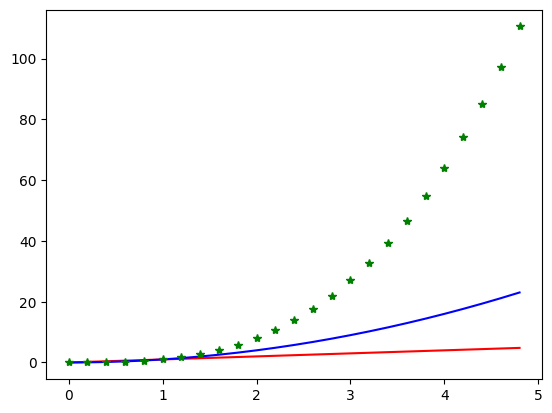

In [92]:
plt.plot(t,t, 'r-', t,t**2, 'b-', t, t**3, 'g*')
#plt.show()  #in script, it will pause and display


character      description 
'-'             solid line style 
'--'            dashed line style 
'-.'            dash-dot line style 
':'             dotted line style 
'.'             point marker 
','             pixel marker 
'o'             circle marker 
'v'             triangle_down marker 
'^'             triangle_up marker 
'<'             triangle_left marker 
'>'             triangle_right marker 
'1'             tri_down marker 
'2'             tri_up marker 
'3'             tri_left marker 
'4'             tri_right marker 
's'             square marker 
'p'             pentagon marker 
'*'             star marker 
'h'             hexagon1 marker 
'H'             hexagon2 marker 
'+'             plus marker 
'x'             x marker 
'D'             diamond marker 
'd'             thin_diamond marker 
'|'             vline marker 
'_'             hline marker 

character   color 
'b'         blue 
'g'         green 
'r'         red 
'c'         cyan 
'm'         magenta 
'

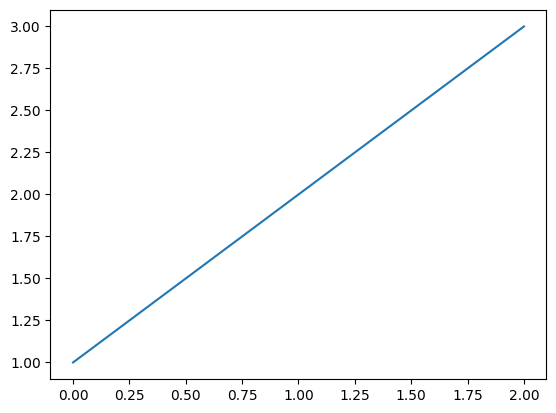

In [93]:
%run code\0.2.plt_options.py

## subplots

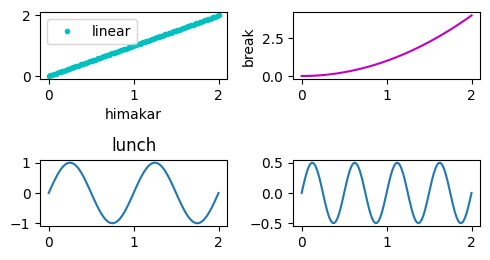

In [102]:
#2 x 2 , first two args, so destructure 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(5,2.7), #in inch
                                         layout='tight') #check doc for how many layout
t = np.linspace(0,2,100)
#fig, axes = plt.subplots(2,2,....)
# ax1 = axes[0,0] , ax2=axes[0,1], ax3=axes[1,0],....
ax1.plot(t,t, 'c.', label='linear')
ax2.plot(t, t**2, 'm-', label='quadratic')
ax3.plot(t, np.sin(2*np.pi*t), label='sin')
ax4.plot(t, np.sin(2*np.pi*t) * np.cos(2*np.pi*t), label='sin(t)*cos(t)')
ax1.set_xlabel('himakar')
ax2.set_ylabel('break')
ax3.set_title('lunch')
ax1.legend()


use with prefix plt. or ax.
https://matplotlib.org/3.1.0/api/pyplot_summary.html

acorr(x)                    
    Plot the autocorrelation of  x.
xcorr(x,y)                  
    Plot the cross correlation between x and y.


bar(left, height)           
    Make a bar plot with x=left array and y=height array
barbs(...)                  
    Plot a 2-D field of barbs.
barh(bottom, width)         
    Make a horizontal bar plot with bottom and width array
boxplot(x)                  
    Make a box plot

cohere(x,y)                 
    Plot the coherence between x and  y
contour(x,y,z,N)            
    Plot contours, with egde
contourf(x,y,z,N)           
    Plot contours without edges

stem(x, y, linefmt, markerfmt, basefmt=)        
    plots vertical lines (using linefmt) at each x location from the baseline to y, 
    and places a marker there using markerfmt. 
    A horizontal line at 0 is is plotted using basefmt
errorbar(x, y, yerr, xerr, fmt)                 
    Plot an er

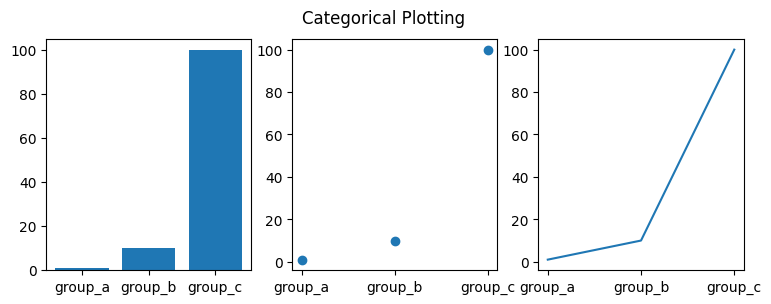

In [105]:
#Other plots 
%run code\0.2.plt_other_plot.py

In [107]:
#


Other 3D plots 
https://matplotlib.org/mpl_toolkits/mplot3d/api.html



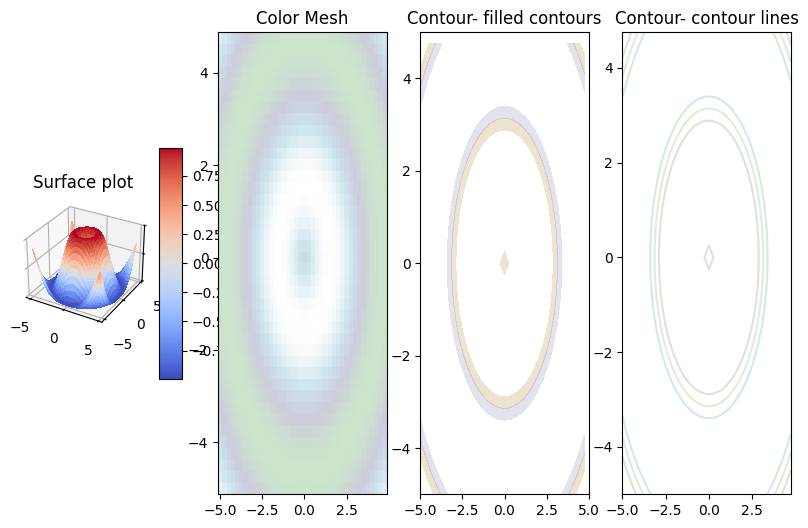

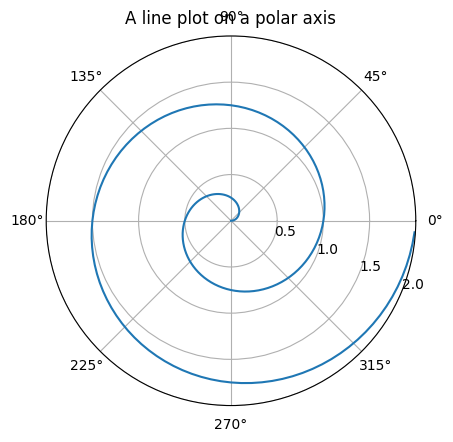

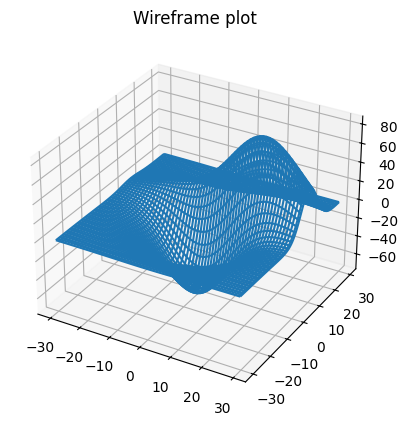

In [103]:
# You can draw 3D figure as well
%run code\0.2.plt_3dr_plot.py

# Pandas

In [108]:
path = r"code\data\iris.csv"
iris = pd.read_csv(path)

In [110]:
#Check metadata
iris.head()  # by default 5 or specify with arg
iris.columns
iris.index  # row_id is called index 
iris.dtypes  # each col datatype


SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [111]:
iris.head() 

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [113]:
len(iris)  #how many rows 

150

In [114]:
#DataFrame - list of Columns/Series 
type(iris), type(iris.SepalLength)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [115]:
len(dir(pd)), len(dir(iris)), len(dir(iris.SepalLength))

(141, 445, 420)

In [118]:
#Access
#.loc[row_id, column_name] and iloc[row index, column index]
#if contains slice,  row_id - slice- end is included, in row_index, it is not 
iris.loc[0:2, ['SepalLength', 'SepalWidth']], iris.iloc[0:3, [0,1]]
#Access like dict or class attributes- only for column 
iris[['SepalLength', 'SepalWidth']]  #Single column - Series, multiple columns-DataFrame
iris.SepalLength                   #<- one col

(     SepalLength  SepalWidth
 0            5.1         3.5
 1            4.9         3.0
 2            4.7         3.2
 3            4.6         3.1
 4            5.0         3.6
 ..           ...         ...
 145          6.7         3.0
 146          6.3         2.5
 147          6.5         3.0
 148          6.2         3.4
 149          5.9         3.0
 
 [150 rows x 2 columns],
 0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
       ... 
 145    6.7
 146    6.3
 147    6.5
 148    6.2
 149    5.9
 Name: SepalLength, Length: 150, dtype: float64)

In [127]:
# loc can contain filter
iris.loc[(iris.SepalLength > 5) & (iris.SepalLength <5.5), :]
iris.loc[(iris.SepalLength > 5) & (iris.SepalLength <5.5), :].reset_index()

index  SepalLength  SepalWidth  PetalLength  PetalWidth             Name
0       0          5.1         3.5          1.4         0.2      Iris-setosa
1       5          5.4         3.9          1.7         0.4      Iris-setosa
2      10          5.4         3.7          1.5         0.2      Iris-setosa
3      16          5.4         3.9          1.3         0.4      Iris-setosa
4      17          5.1         3.5          1.4         0.3      Iris-setosa
5      19          5.1         3.8          1.5         0.3      Iris-setosa
6      20          5.4         3.4          1.7         0.2      Iris-setosa
7      21          5.1         3.7          1.5         0.4      Iris-setosa
8      23          5.1         3.3          1.7         0.5      Iris-setosa
9      27          5.2         3.5          1.5         0.2      Iris-setosa
10     28          5.2         3.4          1.4         0.2      Iris-setosa
11     31          5.4         3.4          1.5         0.4      Iris-setosa
12     32          5.2         4.1          1.5         0.1      Iris-setosa
13     39          5.1         3.4          1.5         0.2      Iris-setosa
14     44          5.1         3.8          1.9         0.4      Iris-setosa
15     46          5.1         3.8          1.6         0.2      Iris-setosa
16     48          5.3         3.7          1.5         0.2      Iris-setosa
17     59          5.2         2.7          3.9         1.4  Iris-versicolor
18     84          5.4         3.0          4.5         1.5  Iris-versicolor
19     98          5.1         2.5          3.0         1.1  Iris-versicolor

In [132]:
#creation of col
iris['dummy'] = iris.SepalLength - 2* iris.SepalWidth - 2 #elementwise 
iris.dummy
#Function apply from np 
iris['dummy'] = np.abs(iris.dummy)  # dont use any builtin function

#delete
iris.drop(columns=['dummy'])  # by default returns new copy 
iris.drop(columns=['dummy'], inplace=True)  #inplace ops
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [144]:
#can change column names 
df = iris.copy()
df.columns = ['a', 'b', 'c', 'd', 'n']
df.head()
#series and df methods
iris.SepalLength.mean()     #scalar
iris.iloc[:,:4].mean()      #by default columnwise
iris.iloc[:,:4].mean(axis=0) 
iris.iloc[:,:4].mean(axis=1)  #rowwise
#many other methods
iris.Name.unique()
#if column is string, many methods on string 
dir(iris.Name.str)  #python string
iris.Name.str.lower()
#if column datetime, we have methods on .dt  eg like .dt.year etc 
#If datetime is an index column, we call it a time series DF 
#Check https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html


0         iris-setosa
1         iris-setosa
2         iris-setosa
3         iris-setosa
4         iris-setosa
            ...      
145    iris-virginica
146    iris-virginica
147    iris-virginica
148    iris-virginica
149    iris-virginica
Name: Name, Length: 150, dtype: object

In [151]:
#concat for hstack or vstack
iris.shape  #(150, 5)
df = iris.copy()
df.shape    #(150, 5)
#vstack - with same column stacked else new col created
pd.concat([iris,df], axis=0).shape #(300, 5)
#hstack , for same index, hstack
#pd.concat([iris,df], axis=1).shape  #(150, 10)



(300, 5)

In [158]:
#vs merge - DB join
# column_name : list of values for that column
df_left = pd.DataFrame(
{"left_a" :[4, 5 , 6],
"left_b" : [7, 8, 9],
"id" : [10, 11, 12]},index = [1, 2, 3])

df_right = pd.DataFrame(
{"right_a" :[4, 5 , 6],
"right_b" : [7, 8, 9],
"id" : [10, 11, 12]},index = [1, 2, 3])
df_left, df_right
df_left.merge(df_right, on='id') #how ='inner'

left_a  left_b  id  right_a  right_b
0       4       7  10        4        7
1       5       8  11        5        8
2       6       9  12        6        9

In [165]:
#group by and aggregation
iris.describe()
gr = iris.groupby('Name')
gr.mean()
gr.agg({'SepalLength': ['mean', 'min','max','count']}).to_excel("proc.xlsx")


In [166]:
!dir proc.*

 Volume in drive D is LENOVO
 Volume Serial Number is 6E11-7CA2

 Directory of D:\handson

16-04-2025  15:11             5,164 proc.xlsx
               1 File(s)          5,164 bytes
               0 Dir(s)   8,151,986,176 bytes free


<Axes: >

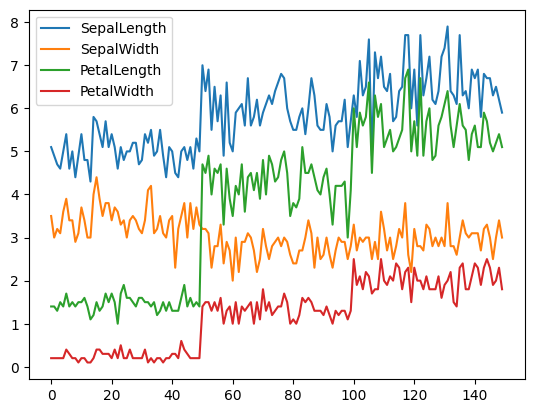

In [167]:
#plot - https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
iris.iloc[:,:4].plot(kind='line')
#https://www.data-to-viz.com/

# Hands-ON

In [ ]:
# Load boston data (in online notepad)
# load it, see metadata
#create a new colum multiplying CRIM and LSTAT
#what is max and min and average of MEDV
#what is the average value of MEDV for each value of CHAS
#which factor most negatively impacts MEDV ? (Use corr)

"""
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

"""

In [168]:
boston = pd.read_csv(r"code\data\boston.csv")


In [169]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [184]:
#create a new column multiplying CRIM and LSTAT
boston['nc'] = boston['crim'] * boston['lstat']
boston.agg({'medv':['min','max','mean']})

medv
min    5.000000
max   50.000000
mean  22.532806

In [170]:
boston.chas.unique()

array([0, 1], dtype=int64)

In [171]:
boston.groupby('chas')['medv'].mean()

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64

In [189]:
boston.corr()['medv'].idxmin()


crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
nc        -0.422216
Name: medv, dtype: float64

In [179]:
nindex = set(boston.corr()['medv'].index) - {'lstat'}


In [181]:
boston.corr()['medv'].loc[list(nindex)].idxmin()

'ptratio'